In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [15]:
data1=pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

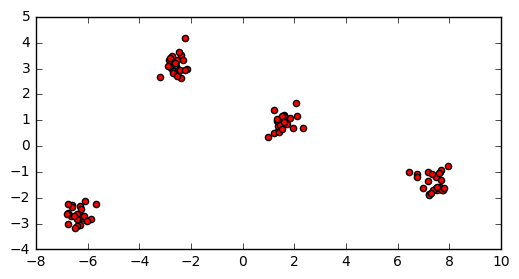

I guess that the number of clusters could be: 4


In [16]:
from sklearn.decomposition import PCA
pca=PCA(2)
Xproj=pca.fit_transform(data1)
plt.scatter(Xproj[:,0], Xproj[:,1], c="r")
plt.gca().set_aspect('equal')
plt.show()

print('I guess that the number of clusters could be: 4')

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

In [19]:
rr=KMeans(n_clusters=4).fit(data1)
rr.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

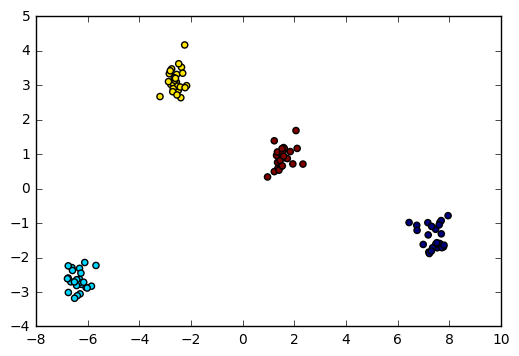

In [20]:
plt.scatter(Xproj[:,0],Xproj[:,1],c=rr.labels_)
plt.show()

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

In [21]:
# Silhouette
import matplotlib.cm as cm

X=data1
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 the average silhouette_score is: 0.577195417571136
For n_clusters = 3 the average silhouette_score is: 0.7297516561326935
For n_clusters = 4 the average silhouette_score is: 0.8435353230318726
For n_clusters = 5 the average silhouette_score is: 0.6890604561532443
For n_clusters = 6 the average silhouette_score is: 0.5330611952758896
For n_clusters = 7 the average silhouette_score is: 0.3535887960143207
For n_clusters = 8 the average silhouette_score is: 0.19841504100286173
For n_clusters = 9 the average silhouette_score is: 0.19514742484821274


#### When n=4, the ss reaches max. So we choose k=4.

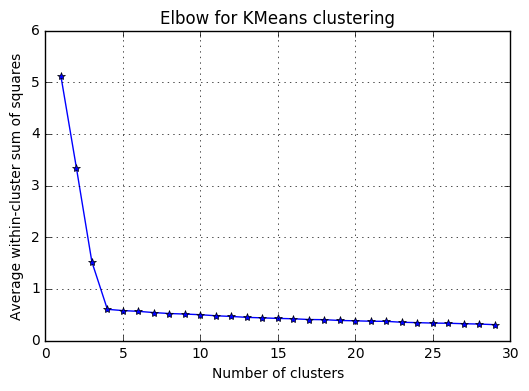

In [76]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K,k_opt=2):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.

    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    centroids = [k.cluster_centers_ for k in KM]

    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss

    kIdx = 10-1

    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
#     ax.plot(K[k_opt], avgWithinSS[k_opt], marker='o', markersize=12,
#             markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(data1, range(1,30))

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [81]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=4)
res1=gm.fit(data1).predict(data1)
res1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

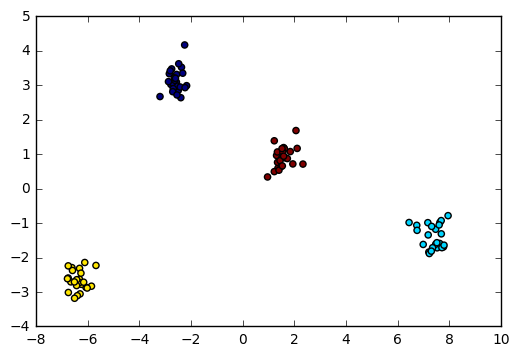

In [82]:
plt.scatter(Xproj[:,0],Xproj[:,1],c=res1)
plt.show()

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [109]:
data2=pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [105]:
# Factorize the data set.
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data2.T)): # Change for every column, one by one
    temp=data2.iloc[:,i]
    try:                      # Change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) # Factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
# Then, make it into a Pandas DataFrame:
data_q2=pd.DataFrame(data_temp).T
data_q2.columns=data2.columns
data_q2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3781862.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3781130.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,3781009.0,2.0,2.0,0.0,0.0,0.0
3,0.0,0.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3780501.0,2.0,3.0,0.0,0.0,0.0
4,0.0,0.0,1.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,3780511.0,1.0,1.0,1.0,0.0,0.0


In [108]:
#a) For finding duplicates, we calculate the score of accuracy. We stop when we get 0 distance. The only possible
# situation is that the number of unique observations is equal to the number of clusters..
import sklearn.cluster as cluster
for i in range(610,680):
    est=cluster.KMeans(n_clusters=i)
    est.fit(data_q2)
    print(est.score(data_q2))
    if est.score(data_q2)==0:
        print('We have {} unique elements.'.format(i))
        break

-390.00390625
-298.0
-229.0
-167.0
-106.0
-54.0
-12.0
-0.0
We have 617 unique elements.


We use est.score() to find duplicates after factorizing the string variables. When we reach the point a score of 0, this means that each unique observation has its own cluster, so n_clusters is equal to the number of unique observations.

In [107]:
#b) Check the unique observations.(pandas has a good function drop_duplicates to help us):
ans=len(data_q2.drop_duplicates())
print('We have {} unique elements.'.format(ans))

We have 617 unique elements.


## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

a, d, f, g

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [22]:
data4 = pd.read_csv('hw4data4.csv')

#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

#### c) Use your trained model to predict labels for the test data. (3 pts)

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [23]:
#a
lr = LogisticRegression(C=1e4)
#b
train = data4[:100]
test = data4[100:]
lr.fit(train[['x1','x2','x3']], train['y'])
print(lr.coef_)
print(lr.intercept_)

[[-27.44775857 -73.61158286 -22.62892951]]
[-1.26536347]


In [24]:
#c
labelPred = lr.predict(test[['x1','x2','x3']])

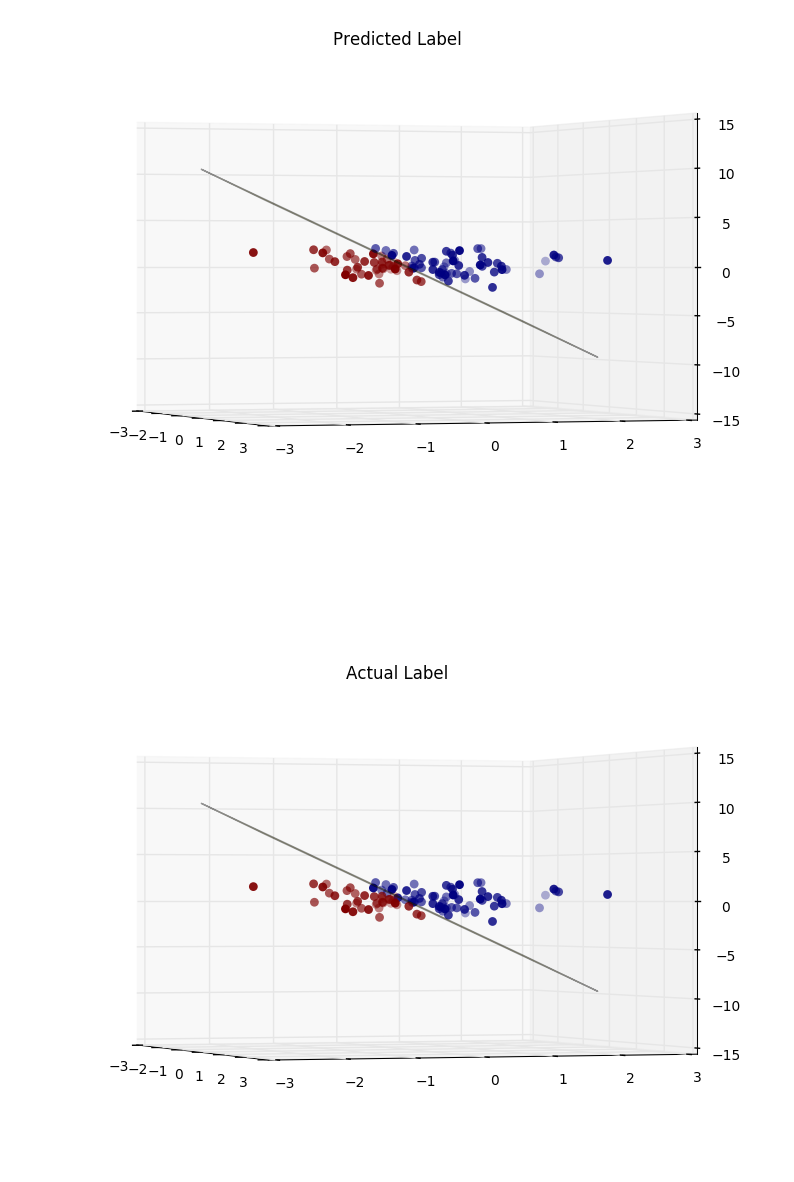

In [25]:
#d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,15))
ax1, ax2 = fig.add_subplot(211, projection='3d'), fig.add_subplot(212, projection='3d')
ax1.set(title='Predicted Label')
ax2.set(title='Actual Label')
ax1.scatter(test.x1, test.x2, test.x3, lw = 0, s = 40, c = labelPred)
ax2.scatter(test.x1, test.x2, test.x3, lw = 0, s = 40, c = test.y)

#decision boundary
steps1 = np.arange(test.x1.min(),test.x1.max())
steps2 = np.arange(test.x2.min(),test.x2.max())
xx, yy = np.meshgrid(steps1, steps2)
zz = -(lr.intercept_[0] + lr.coef_[0][0]*xx + lr.coef_[0][1]*yy)/lr.coef_[0][2]
ax1.plot_surface(xx,yy,zz, color='y', alpha = 0.4)
ax2.plot_surface(xx,yy,zz, color='y', alpha = 0.4)

ax1.view_init(elev=0, azim=-20)
ax2.view_init(elev=0, azim=-20)
plt.show()

In [26]:
#e
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(test.y==1))
FP = sum((labelPred==1)&(test.y==0))
FN = sum((labelPred==0)&(test.y==1))
TN = sum((labelPred==0)&(test.y==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 88.10%
Accuracy = 95.00%
Recall = 100.00%


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy
    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

In [505]:
#a
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
#b
logreg = LogisticRegression(C = 1e6)
logreg.fit(X, y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [506]:
#c
y_pred = logreg.predict(X)
from sklearn.metrics import confusion_matrix
#d
CM = confusion_matrix(y, y_pred)
CM

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [507]:
#e
prec = 100.0 * CM[0][0] / sum([true_class[0] for true_class in CM])
acc = 100.0 * np.diag(CM).sum() / CM.sum()
print('The precision of class 0: %.2f%%'%prec)
print('The accuracy of the model: %.2f%%'%acc)

The precision of class 0: 100.00%
The accuracy of the model: 98.00%


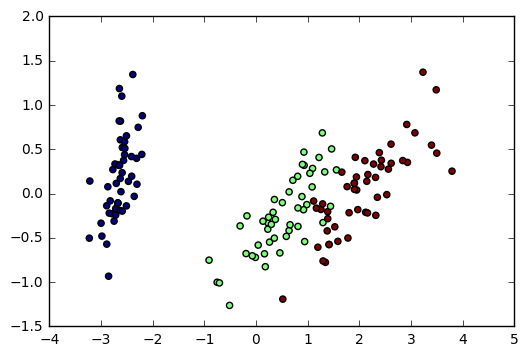

In [515]:
#f
pca=PCA(2)
Xproj=pca.fit_transform(X)
plt.scatter(Xproj[:,0], Xproj[:,1], c=y_pred)
plt.show()